In [1]:
import random
from lib.num import gen_primes, co_prime_num

In [2]:
print(list(gen_primes(100)))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


Fermat's little theoreme

In [3]:
p = list(gen_primes(50))[-1] # 47
a = 16
p_pow = a**p
reminder = p_pow % p
print(f"a**p = {p_pow}")
print(f"a**p mode p = {reminder} === {a}")

a**p = 392318858461667547739736838950479151006397215279002157056
a**p mode p = 16 === 16


Compare methods of finding the amount of co-prime numbers

In [4]:
prime_list = list(gen_primes(100))
p = prime_list[-1] # 97
q = prime_list[-2] # 89
n = p * q
print(f"n = {n}")

n = 8633


In [5]:
#%timeit co_prime_num(n)

In [6]:
#%timeit (p - 1) * (q - 1)

RSA implementation

In [7]:
prime_list = list(gen_primes(100))
# choose any 2 prime numbers, they needed only for generating an "n" and ϕ(n)
p = prime_list[-1] # 97
q = prime_list[-2] # 89
n = p*q
z = (p-1)*(q-1) # ϕ(n)
# now we need to find e and d to satispy en equesion ed % z = 1
primes_to_z = list(gen_primes(z))

e = random.choice(primes_to_z) # this will be used as a public key# this will be used as a public key
# !IMPORTANT e shouldn't be a divisor of z

# finding a private key d
for i in range(1, z):
    x = 1 + i*z
    if x % e == 0:
        d = x // e
        break
print(e,d) # e - public key, d - private key

839 6263


In [8]:
info = 528
e_info = info ** e % n
d_info = e_info ** d % n
print(f"encrypted info is {e_info}; decrypted info is {d_info}")

encrypted info is 1640; decrypted info is 528


Or encapsulated version of the same thing

In [9]:
from lib.crypto import RSA

In [10]:
enc = RSA(p, q)
print(enc.public_key, enc.private_key)

3877 6829


In [16]:
a = enc.encrypt(97) # leter 'a', check ord('a') to be sure
print(a)
b = enc.decrypt(a)
print(b)

194
97


Eliptice Curve Cryptography

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lib.crypto import EllipticCurve
from lib.la import Vector

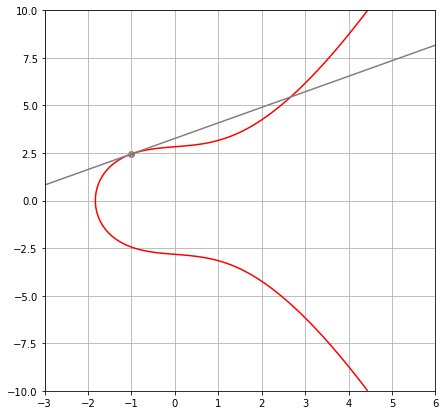

In [22]:
y, x = np.ogrid[-10:10:100j, -3:6:100j]

a = 1
b = 8
ecc = EllipticCurve(a, b)
p = Vector(-1, ecc.get_y_by_x(-1)[0])

S, shift = ecc.line(p, p)
tan = y - S*x - shift

plt.figure(figsize=(7,7))
plt.scatter(p[0], p[1], c="grey")
plt.contour(x.ravel(), y.ravel(), (y**2 - x**3 - a*x - b), [0], colors=["#FF0000"])
plt.contour(x.ravel(), y.ravel(), tan, [0], colors=["grey"])
plt.grid()

**Linear algebra**

In [1]:
from lib.la import draw2d, Vector

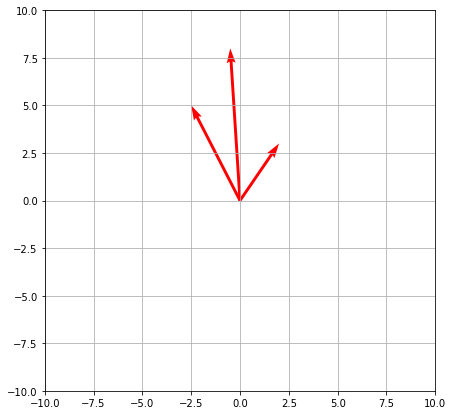

In [2]:
v1 = Vector(2, 3)
v2 = Vector(-2.5, 5)
draw2d(v1, v2, v1 + v2)